# Importing libraries and functions

In [38]:
from Utils.Data_processing import *

%load_ext autoreload
%autoreload 2
df = pd.read_csv(r"Data\train.csv")
Effient_net_hist = pd.read_csv(r"csv\history_effientNet.csv")
U_Net_hist = pd.read_csv(r"csv\history1.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading and processing data

In [39]:
df = rename_df(df)
df_train, train_ids, valid_ids, test_ids = read_data_path(df)
(
    train_generator,
    val_generator,
    train_generator0,
    val_generator0,
    train_generator1,
    val_generator1,
    train_generator2,
    val_generator2,
) = data_gene(df_train, train_ids, valid_ids, test_ids)

## Visualization of model performance

In [40]:
modes = list(Effient_net_hist.columns[1:8])
modes

['loss',
 'dice_coef',
 'f1-score',
 'f2-score',
 'precision',
 'recall',
 'iou_score']

In [41]:
mode = modes[0]
animate_plot(
    Effient_net_hist,
    Plot_mode=mode,
    delay=75,
    streamlit=False,
    title=mode+" for effientNet",
    SHOW_GRID=False,
)

In [42]:
modes2 = list(U_Net_hist.columns[1:4])
modes2

['loss', 'accuracy', 'jacard_coef']

In [43]:
mode2 = modes2[0]
animate_plot(
    U_Net_hist,
    Plot_mode=mode2,
    delay=75,
    streamlit=False,
    title=mode2+" for U-Net",
    autorange=False,
    SHOW_GRID=False,
)

## Showing EfficientNet model results

#### showing randome sample from Data with real masks

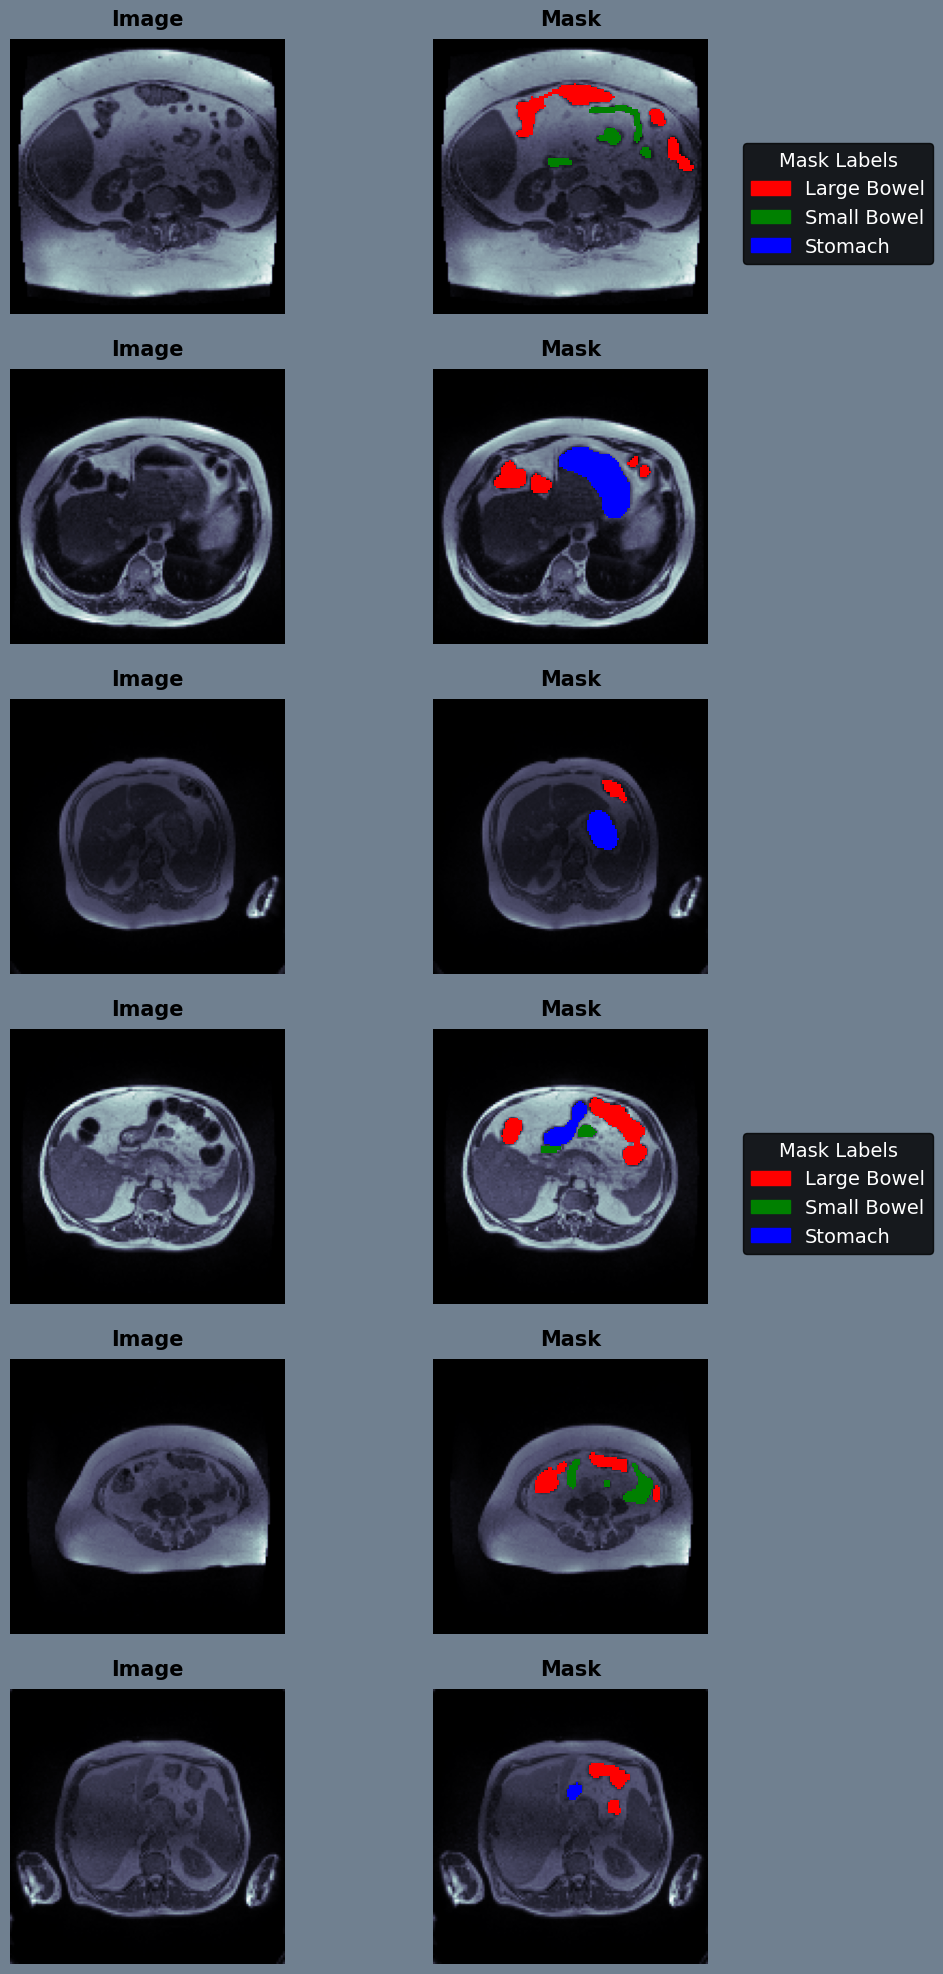

In [44]:
%matplotlib inline
_ = Inspect_data(df_train, show_legend_every = 3)

## Loading and compiling model

In [45]:
model = tf.keras.models.load_model('Models\model0_nocompile.h5', compile = False)
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_coef,f1_score,f2_score,precision,recall,iou_score])

6/6 [==============================] - 6s 95ms/step


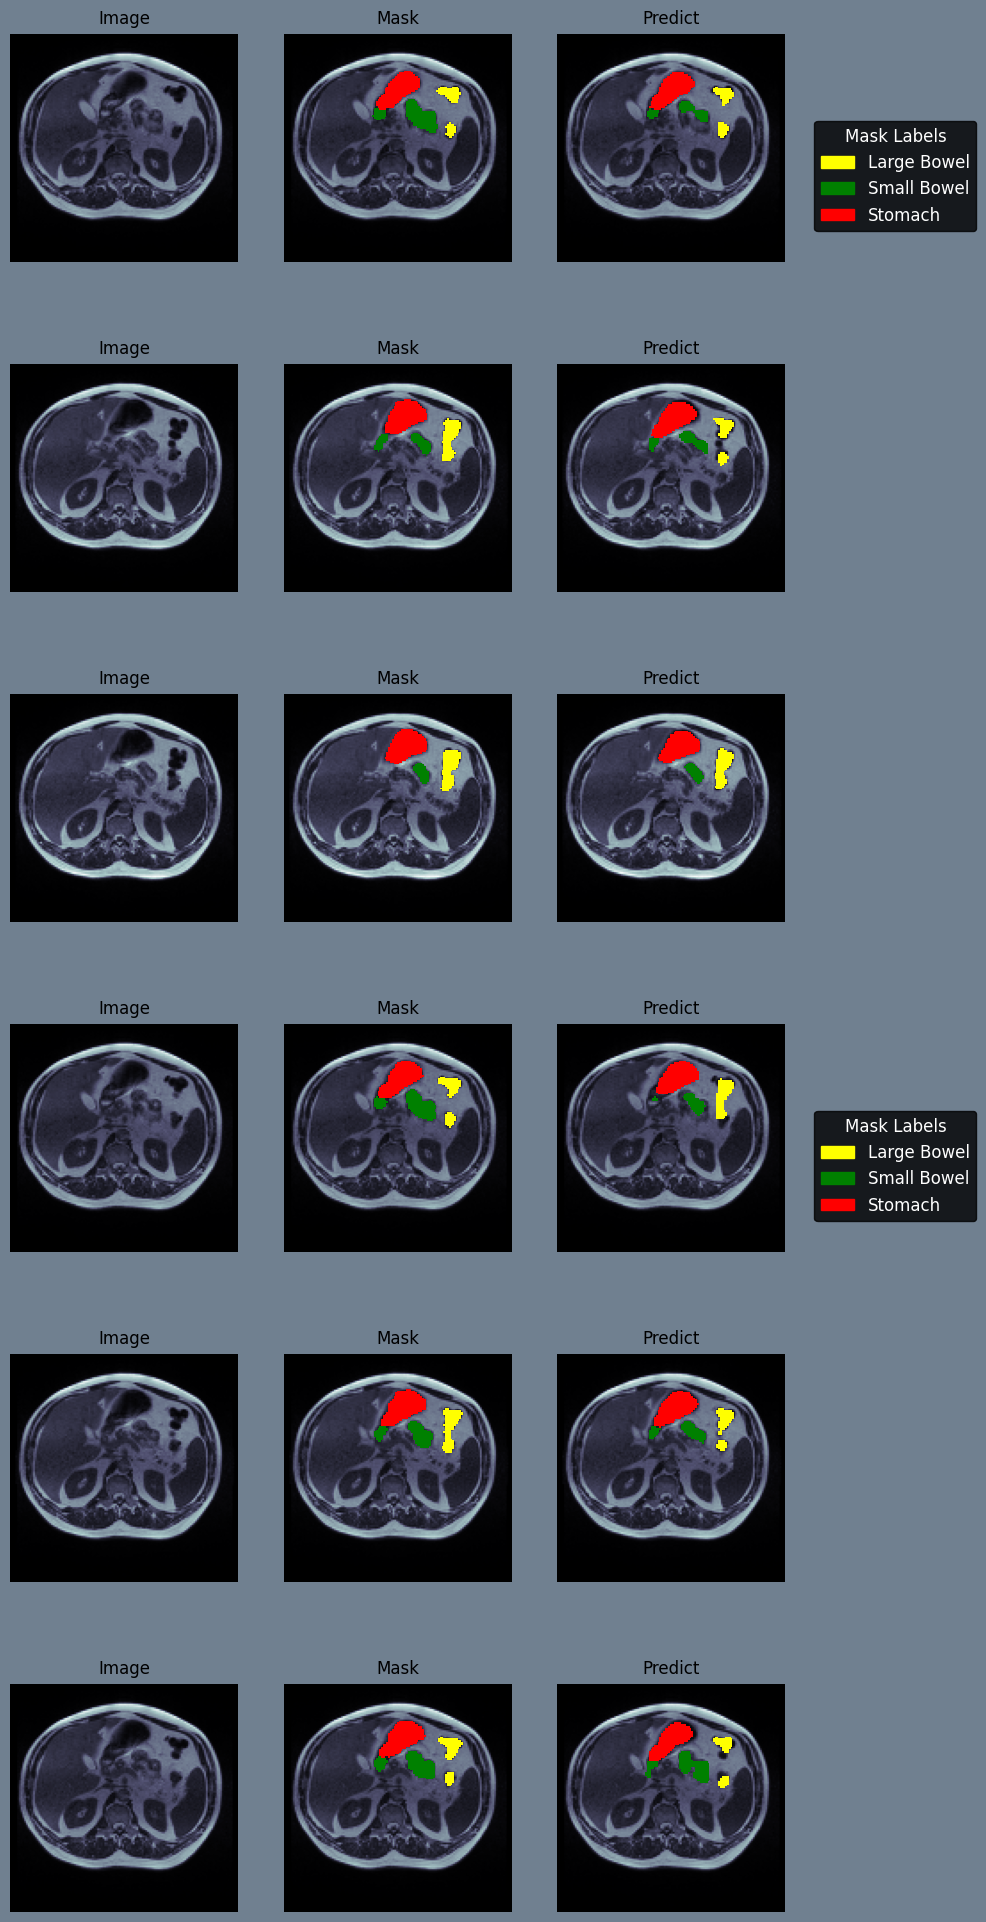

In [46]:
_ = Plot_predicte_masks(model,df_train,valid_ids ,start = 20, end = 26, show_legend_every = 3)